# 0 - Importar Bibliotecas Necessárias:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from scipy import stats

# 1 - Análise Exploratória de Dados:
Realizar análise estatística dos atributos (médias, desvios, valores faltantes, etc.). Gerar visualizações (gráficos de dispersão, histogramas, correlações) que ajudem na compreensão dos dados.

| Variável                   | Descrição                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------|
| gender                     | Sexo biológico do paciente (1: masculino, 2: feminino)                                      |
| etiology of CKD            | Etiologia da doença renal crônica                                                           |
| CKD_stage                  | Estágio da doença renal crônica no início do estudo                                         |
| urinary occult blood       | Presença de sangue oculto na urina                                                          |
| UPCR category              | Categoria do índice proteína/creatinina urinária                                            |
| hypertension               | Diagnóstico de hipertensão arterial                                                         |
| prevalence of CVD          | Presença prévia de doença cardiovascular                                                    |
| diabetes                   | Diagnóstico prévio de diabetes mellitus                                                     |
| use of RAASi               | Uso de inibidores do sistema renina-angiotensina                                            |
| use of CCB                 | Uso de bloqueadores de canal de cálcio                                                      |
| use of diuretics           | Uso de diuréticos                                                                           |
| age_cat                    | Idade                                                                                       |
| SBP_cat                    | Pressão arterial sistólica                                                                  |
| BMI_cat                    | Índice de massa corporal                                                                    |
| Hb_cat                     | Hemoglobina                                                                                 |
| Alb_cat                    | Albumina sérica                                                                             |
| Cr_cat                     | Creatinina sérica                                                                           |
| UPCR_cat                   | Índice proteína/creatinina urinária                                                         |
| CKD progression            | Variável-alvo: progressão da doença renal crônica (0: não, 1: sim)                         |

In [10]:
# Abrir arquivo csv
df = pd.read_csv("ckd.csv")
df.head()

,Sex,Age,Systolic_Pressure,BMI,CKD_Cause,Hemoglobin,Albumin,Creatinine,eGFR,CKD_Stage,...,Occult_Blood_in_Urine,Protein_Creatinine_Ratio,UPCR_Severity,Hypertension,Previous_CVD,Diabetes,RAAS_Inhibitor,Calcium_Channel_Blocker,Diuretics,CKD_Progression
0,2,74,120.0,23.1,2,12.0,4.0,1.20,34.15,3,...,0.0,1.25,3.0,1,0,0,1,1,0,0
1,1,39,121.0,31.7,3,15.0,4.7,1.31,50.45,3,...,0.0,0.33,2.0,1,0,0,0,0,0,0
2,1,74,143.0,24.6,2,10.9,3.8,4.95,9.80,5,...,0.0,1.76,3.0,1,0,1,1,1,1,1
3,1,57,139.0,28.5,2,15.9,4.8,0.84,73.57,2,...,0.0,0.51,3.0,1,0,0,0,0,0,0
4,1,32,154.0,24.6,4,14.4,4.4,0.87,83.56,2,...,0.0,0.03,1.0,1,0,0,0,0,0,0


## Estatísticas iniciais

In [ ]:
# Médias
print("Médias:")
print(df.mean())

Médias:
Sex                           1.304042
Age                          67.578207
Systolic_Pressure           139.793750
BMI                          23.735664
CKD_Cause                     2.260984
Hemoglobin                   11.938644
Albumin                       3.843073
Creatinine                    2.269411
eGFR                         32.712566
CKD_Stage                     3.603691
CKD_Risk                      7.084762
Dipstick_Proteinuria          1.188948
Proteinuria                   0.632799
Occult_Blood_in_Urine         0.336898
Protein_Creatinine_Ratio      2.160962
UPCR_Severity                 2.289524
Hypertension                  0.902460
Previous_CVD                  0.268014
Diabetes                      0.370826
RAAS_Inhibitor                0.632689
Calcium_Channel_Blocker       0.471002
Diuretics                     0.334798
CKD_Progression               0.246046
dtype: float64


In [ ]:
# Desvios padrão
print("\nDesvios Padrão:")
print(df.std())
# Desvio padrão grande em age, Systolic_Pressure e eGFR


Desvios Padrão:
Sex                          0.460203
Age                         13.672753
Systolic_Pressure           22.454350
BMI                          4.033175
CKD_Cause                    1.010711
Hemoglobin                   2.292645
Albumin                      0.636170
Creatinine                   1.717471
eGFR                        18.716730
CKD_Stage                    0.879886
CKD_Risk                     3.085292
Dipstick_Proteinuria         1.570792
Proteinuria                  0.482257
Occult_Blood_in_Urine        0.472861
Protein_Creatinine_Ratio     3.231214
UPCR_Severity                0.867804
Hypertension                 0.296821
Previous_CVD                 0.443120
Diabetes                     0.483238
RAAS_Inhibitor               0.482284
Calcium_Channel_Blocker      0.499378
Diuretics                    0.472127
CKD_Progression              0.430895
dtype: float64


In [11]:
# Verificar valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
Sex                           0
Age                           0
Systolic_Pressure            18
BMI                         137
CKD_Cause                     0
Hemoglobin                    2
Albumin                      12
Creatinine                    0
eGFR                          0
CKD_Stage                     0
CKD_Risk                     88
Dipstick_Proteinuria         16
Proteinuria                  16
Occult_Blood_in_Urine        16
Protein_Creatinine_Ratio     88
UPCR_Severity                88
Hypertension                  0
Previous_CVD                  0
Diabetes                      0
RAAS_Inhibitor                0
Calcium_Channel_Blocker       0
Diuretics                     0
CKD_Progression               0
dtype: int64


In [11]:
# Verificar tipos de dados
print("\nTipos de dados:")
print(df.dtypes)


Tipos de dados:
Sex                           int64
Age                           int64
Systolic_Pressure           float64
BMI                         float64
CKD_Cause                     int64
Hemoglobin                  float64
Albumin                     float64
Creatinine                  float64
eGFR                        float64
CKD_Stage                     int64
CKD_Risk                    float64
Dipstick_Proteinuria        float64
Proteinuria                 float64
Occult_Blood_in_Urine       float64
Protein_Creatinine_Ratio    float64
UPCR_Severity               float64
Hypertension                  int64
Previous_CVD                  int64
Diabetes                      int64
RAAS_Inhibitor                int64
Calcium_Channel_Blocker       int64
Diuretics                     int64
CKD_Progression               int64
dtype: object


In [3]:
# Quantidade de linhas e colunas
print("\nQuantidade de linhas e colunas:")
print(df.shape)


Quantidade de linhas e colunas:
(1138, 23)


## Gráficos 

### Gráficos de Dispersão:

**O que representam:**
- Cada ponto = um paciente
- Eixo X = valor da variável (ex: idade, pressão arterial)  
- Eixo Y = resultado (progressão da doença ou estágio)

**Padrões importantes a observar:**
- **Separação clara**: Variáveis que separam bem os grupos são boas preditoras
- **Sobreposição**: Muita mistura indica menor poder preditivo
- **Tendências**: Linhas ascendentes/descendentes mostram correlação
- **Agrupamentos**: Concentração de pontos em certas regiões

**Para CKD_Progression (0/1):**
- Pontos em Y=0: pacientes SEM progressão
- Pontos em Y=1: pacientes COM progressão

**Para CKD_Stage (1-5):**
- Y=1: estágio inicial
- Y=5: estágio mais avançado

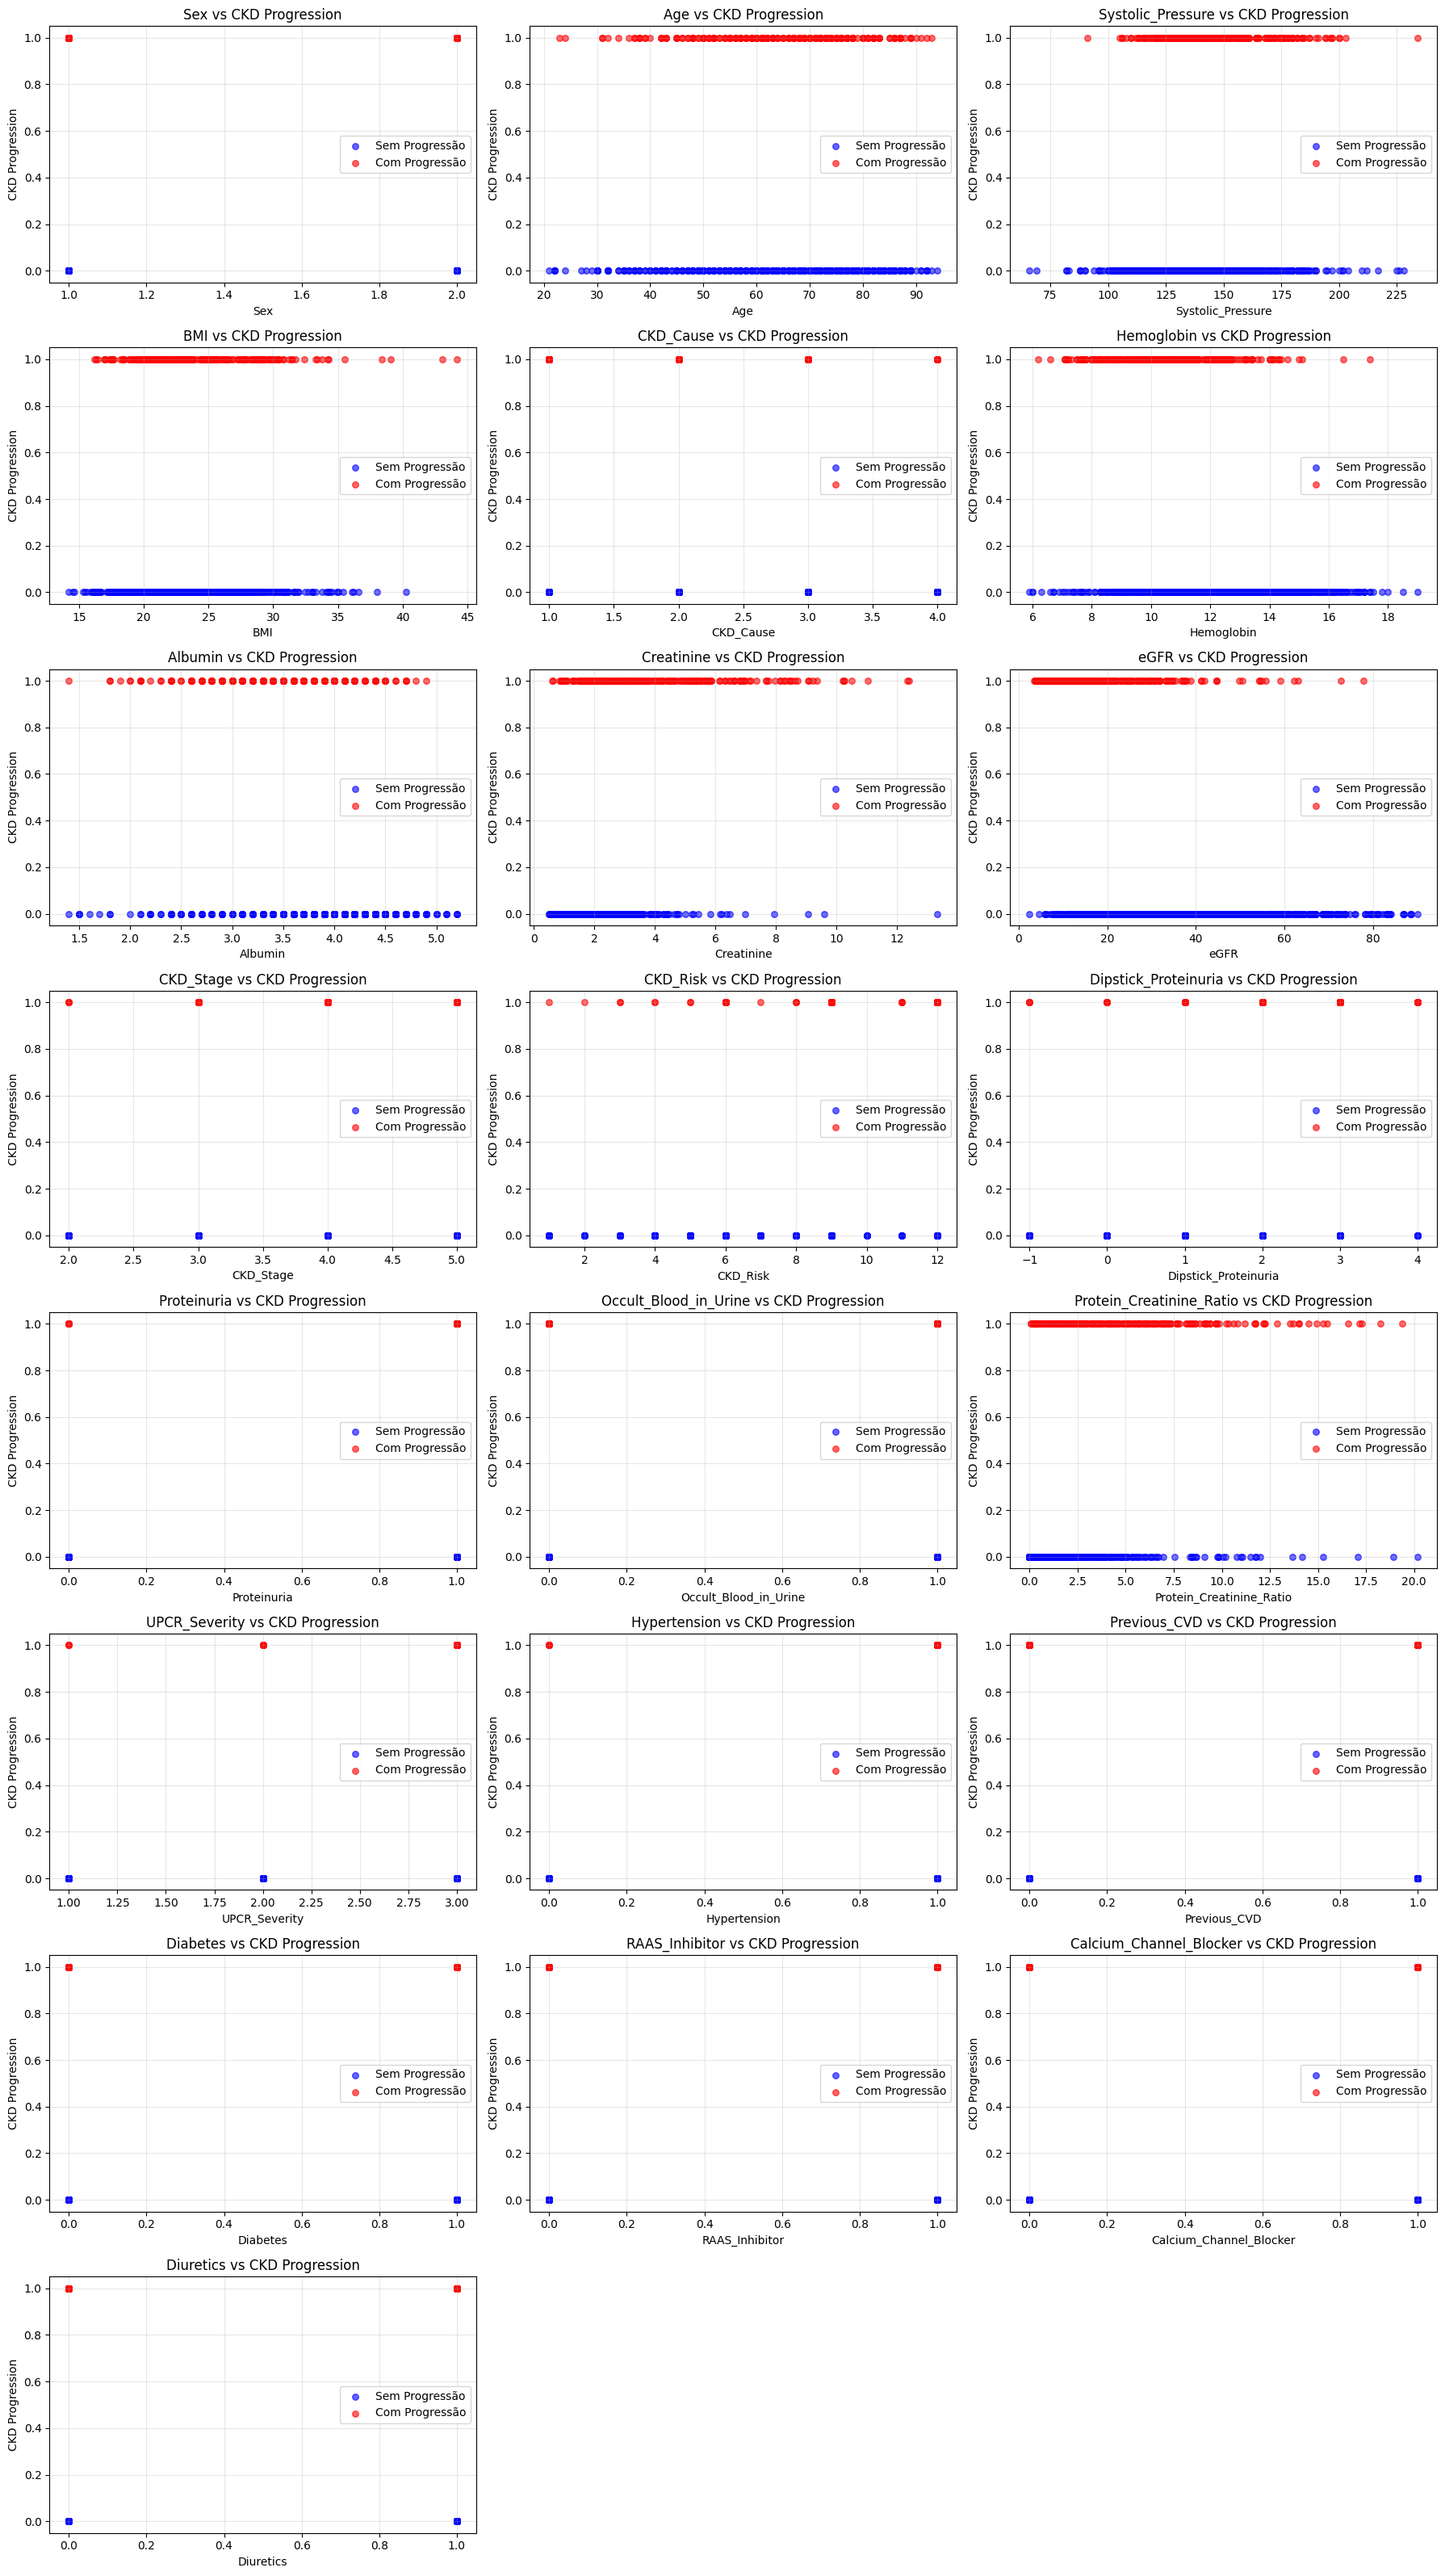

In [12]:
# Gráfico de dispersão MELHORADO para CKD_Progression com cores diferentes
import numpy as np

cols = [col for col in df.columns if col != 'CKD_Progression']
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(cols):
    # Separar dados por classe
    no_progression = df[df['CKD_Progression'] == 0]
    progression = df[df['CKD_Progression'] == 1]
    
    # Plotar com cores diferentes
    axes[i].scatter(no_progression[column], no_progression['CKD_Progression'], 
                    alpha=0.6, color='blue', label='Sem Progressão', s=30)
    axes[i].scatter(progression[column], progression['CKD_Progression'], 
                    alpha=0.6, color='red', label='Com Progressão', s=30)
    
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('CKD Progression')
    axes[i].set_title(f'{column} vs CKD Progression')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

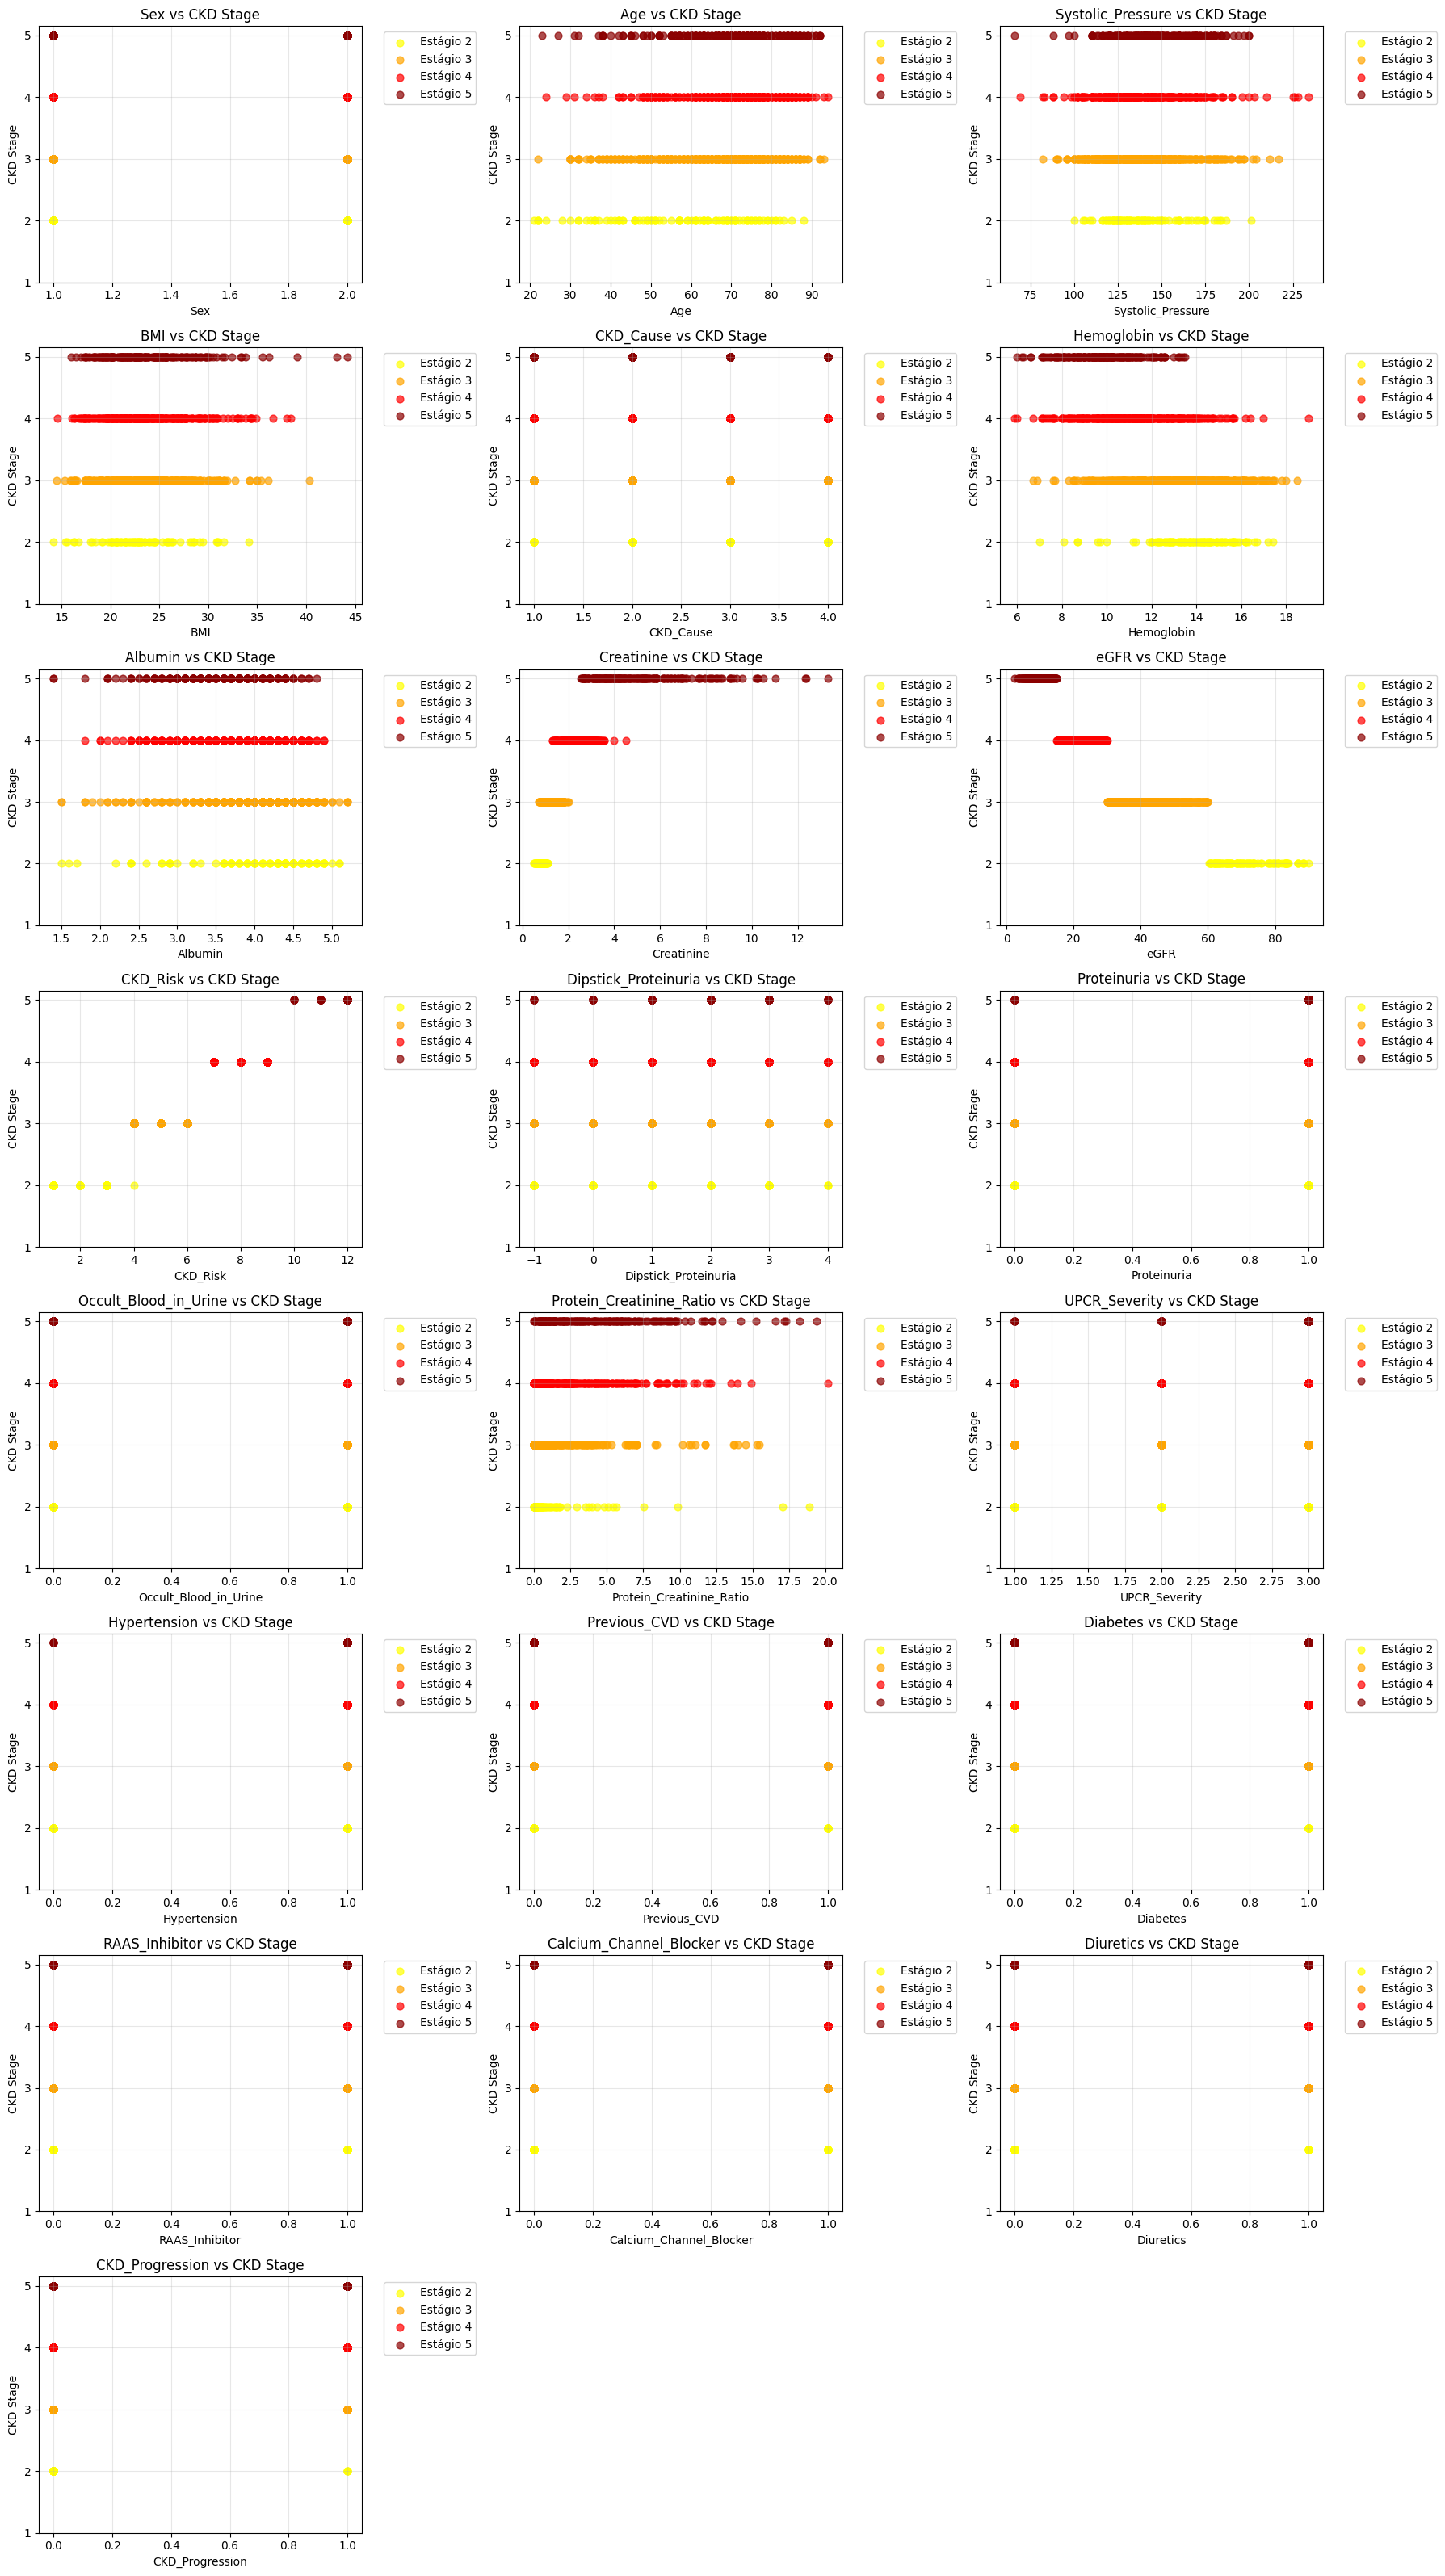

In [ ]:
# Gráfico de dispersão MELHORADO para CKD_Stage com cores diferentes

cols = [col for col in df.columns if col != 'CKD_Stage']
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Cores diferentes para cada estágio
colors = ['green', 'yellow', 'orange', 'red', 'darkred']
stage_labels = ['Estágio 1', 'Estágio 2', 'Estágio 3', 'Estágio 4', 'Estágio 5']

for i, column in enumerate(cols):
    # Plotar cada estágio com cor diferente
    for stage in sorted(df['CKD_Stage'].unique()):
        stage_data = df[df['CKD_Stage'] == stage]
        if len(stage_data) > 0:
            axes[i].scatter(stage_data[column], stage_data['CKD_Stage'], 
                          alpha=0.7, color=colors[stage-1], 
                          label=stage_labels[stage-1], s=40)
    
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('CKD Stage')
    axes[i].set_title(f'{column} vs CKD Stage')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_yticks([1, 2, 3, 4, 5])  # Garantir que mostra todos os estágios

# Remove eixos extras se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Histogramas:

Histogramas são gráficos que mostram a distribuição de frequências de uma variável numérica. Eles permitem visualizar como os valores de uma variável se distribuem ao longo de intervalos (bins), facilitando a identificação de padrões, assimetrias, outliers e possíveis agrupamentos nos dados.

**Principais pontos sobre histogramas:**
- O eixo X representa os intervalos de valores (bins) da variável.
- O eixo Y mostra a quantidade (frequência) de observações em cada intervalo.
- Permitem comparar a distribuição de uma variável entre diferentes grupos (ex: pacientes com e sem progressão da doença).
- São úteis para detectar desvios, valores extremos e a forma geral da distribuição (normal, assimétrica, bimodal, etc).

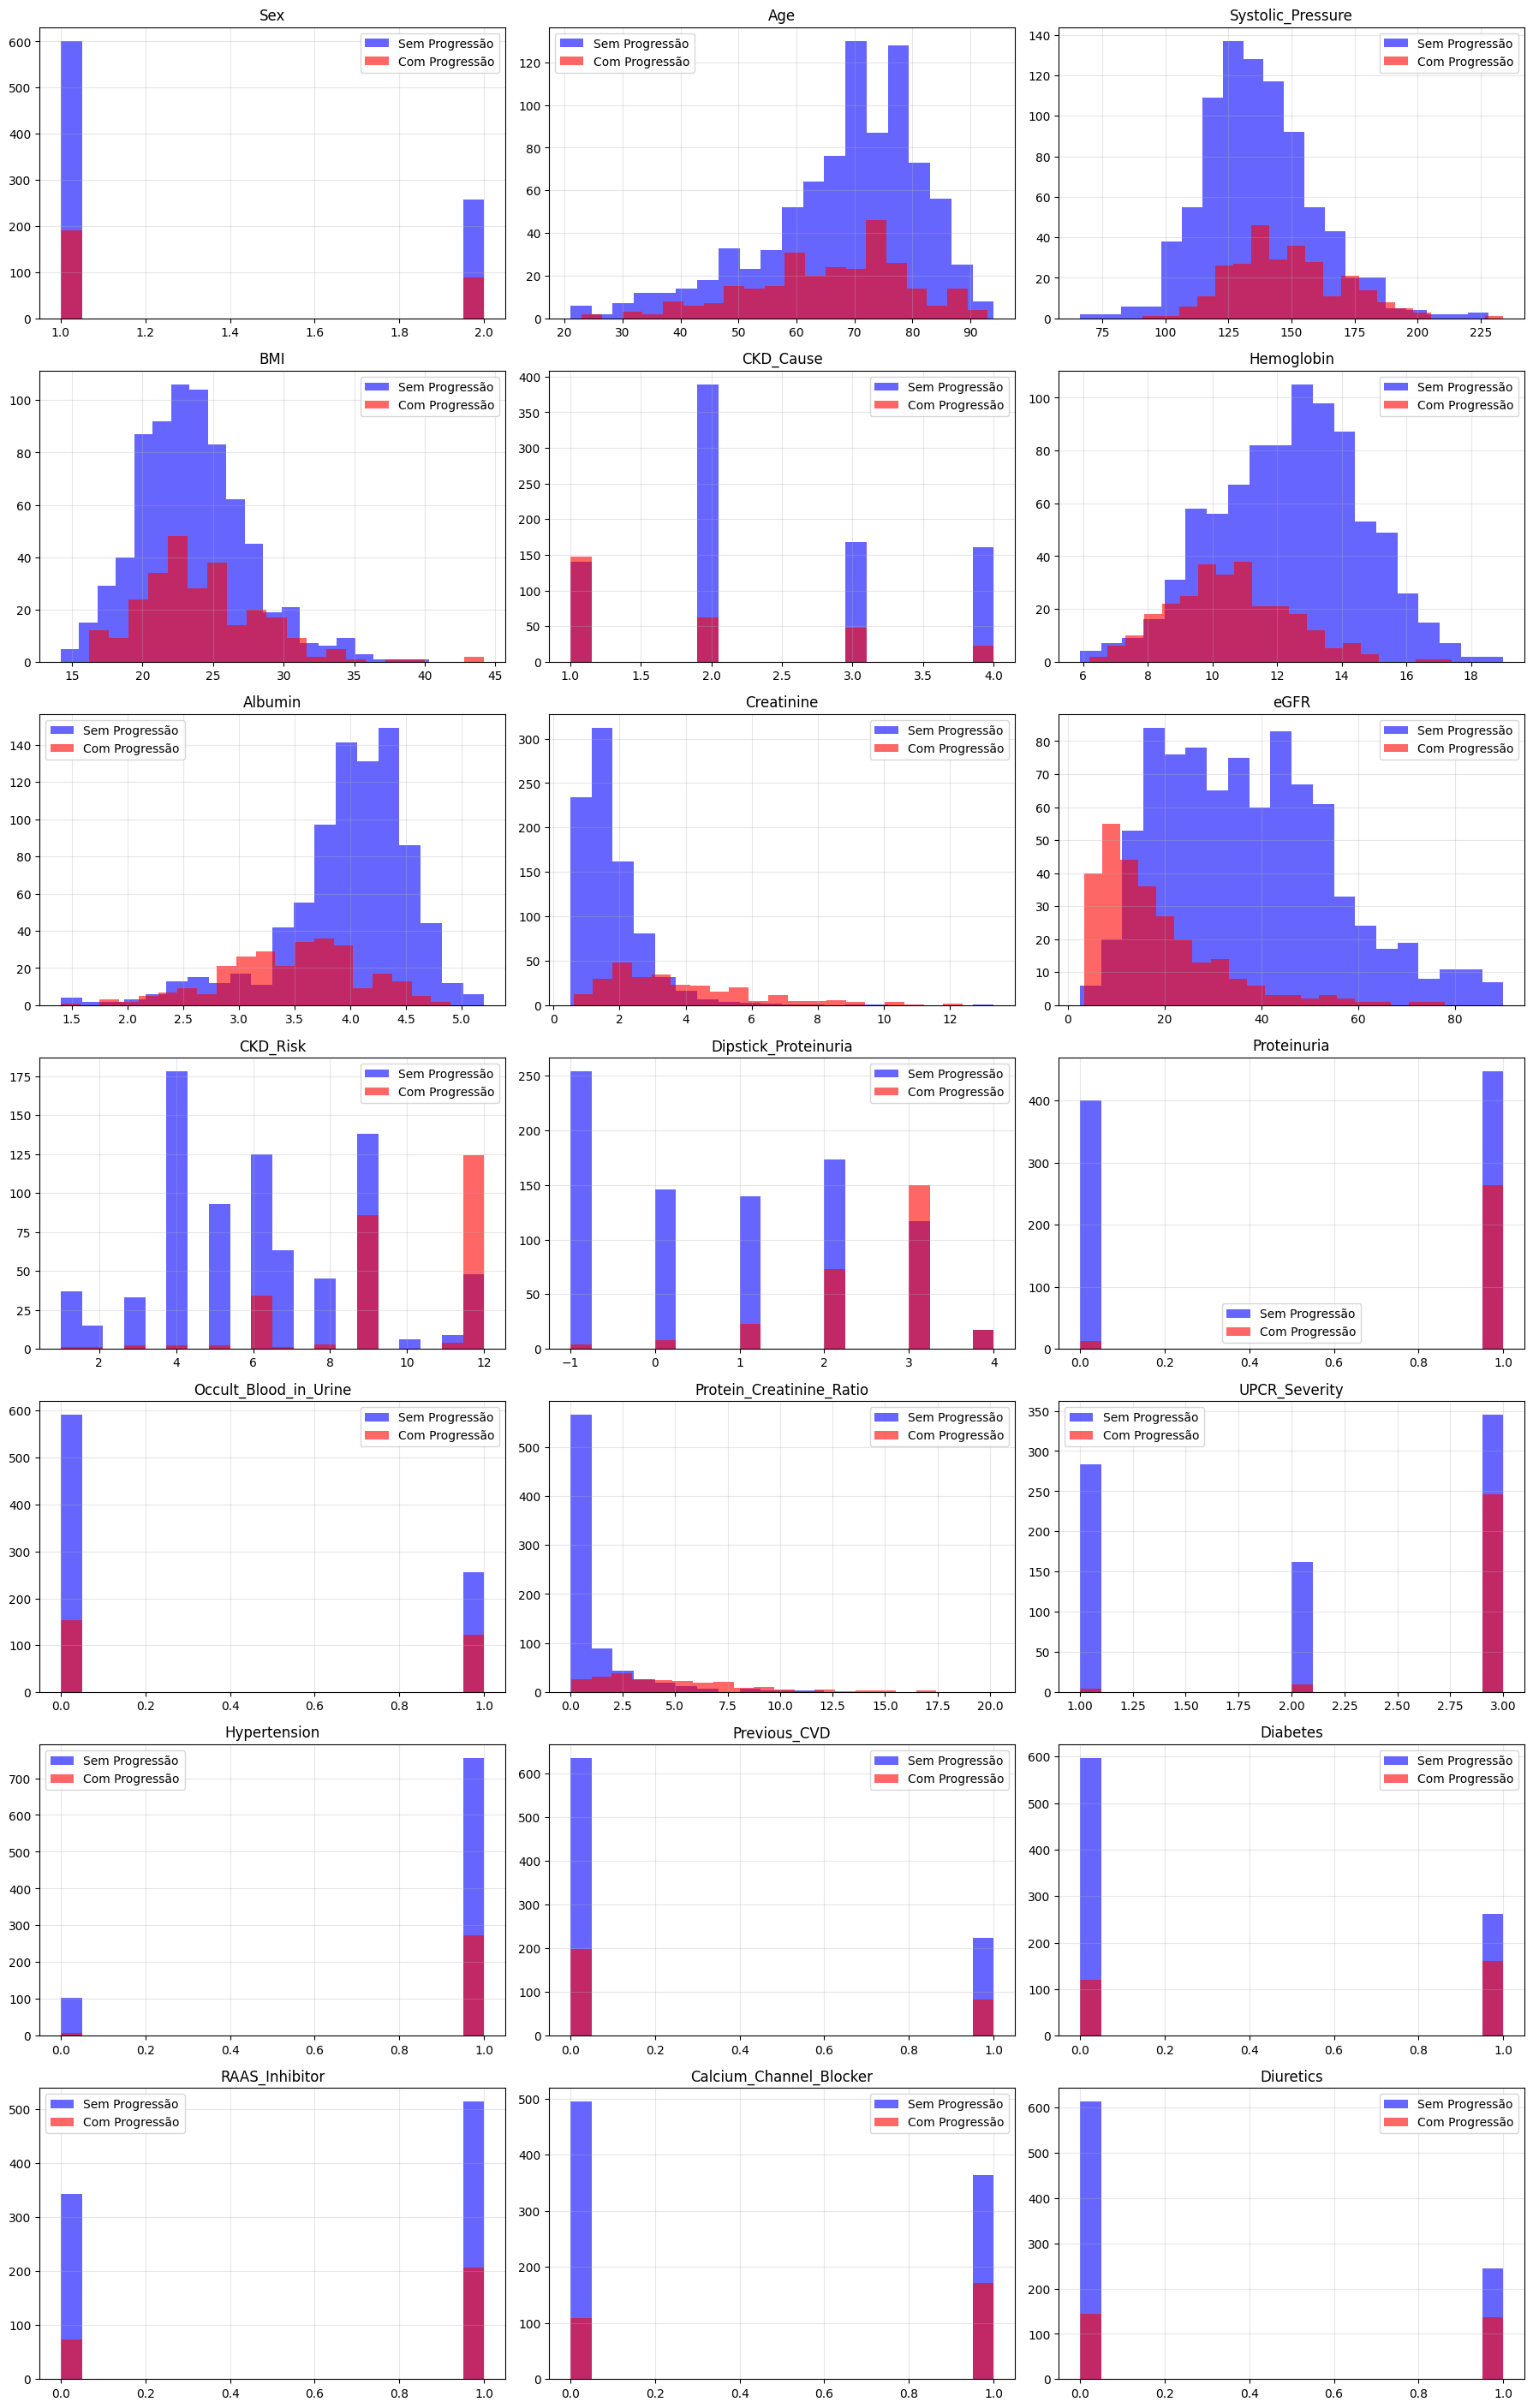

In [17]:
# Plotar histogramas para cada variável em cols, separados por CKD_Progression
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(cols[:-1]):
	if col == 'CKD_Progression':
		continue  # Não faz sentido plotar histograma da variável alvo
	# Remover valores nulos para cada grupo
	data0 = df[df['CKD_Progression'] == 0][col].dropna()
	data1 = df[df['CKD_Progression'] == 1][col].dropna()
	axes[idx].hist(data0, bins=20, alpha=0.6, label='Sem Progressão', color='blue')
	axes[idx].hist(data1, bins=20, alpha=0.6, label='Com Progressão', color='red')
	axes[idx].set_title(col)
	axes[idx].legend()
	axes[idx].grid(True, alpha=0.3)

# Remove eixos extras
for j in range(idx + 1, len(axes)):
	fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

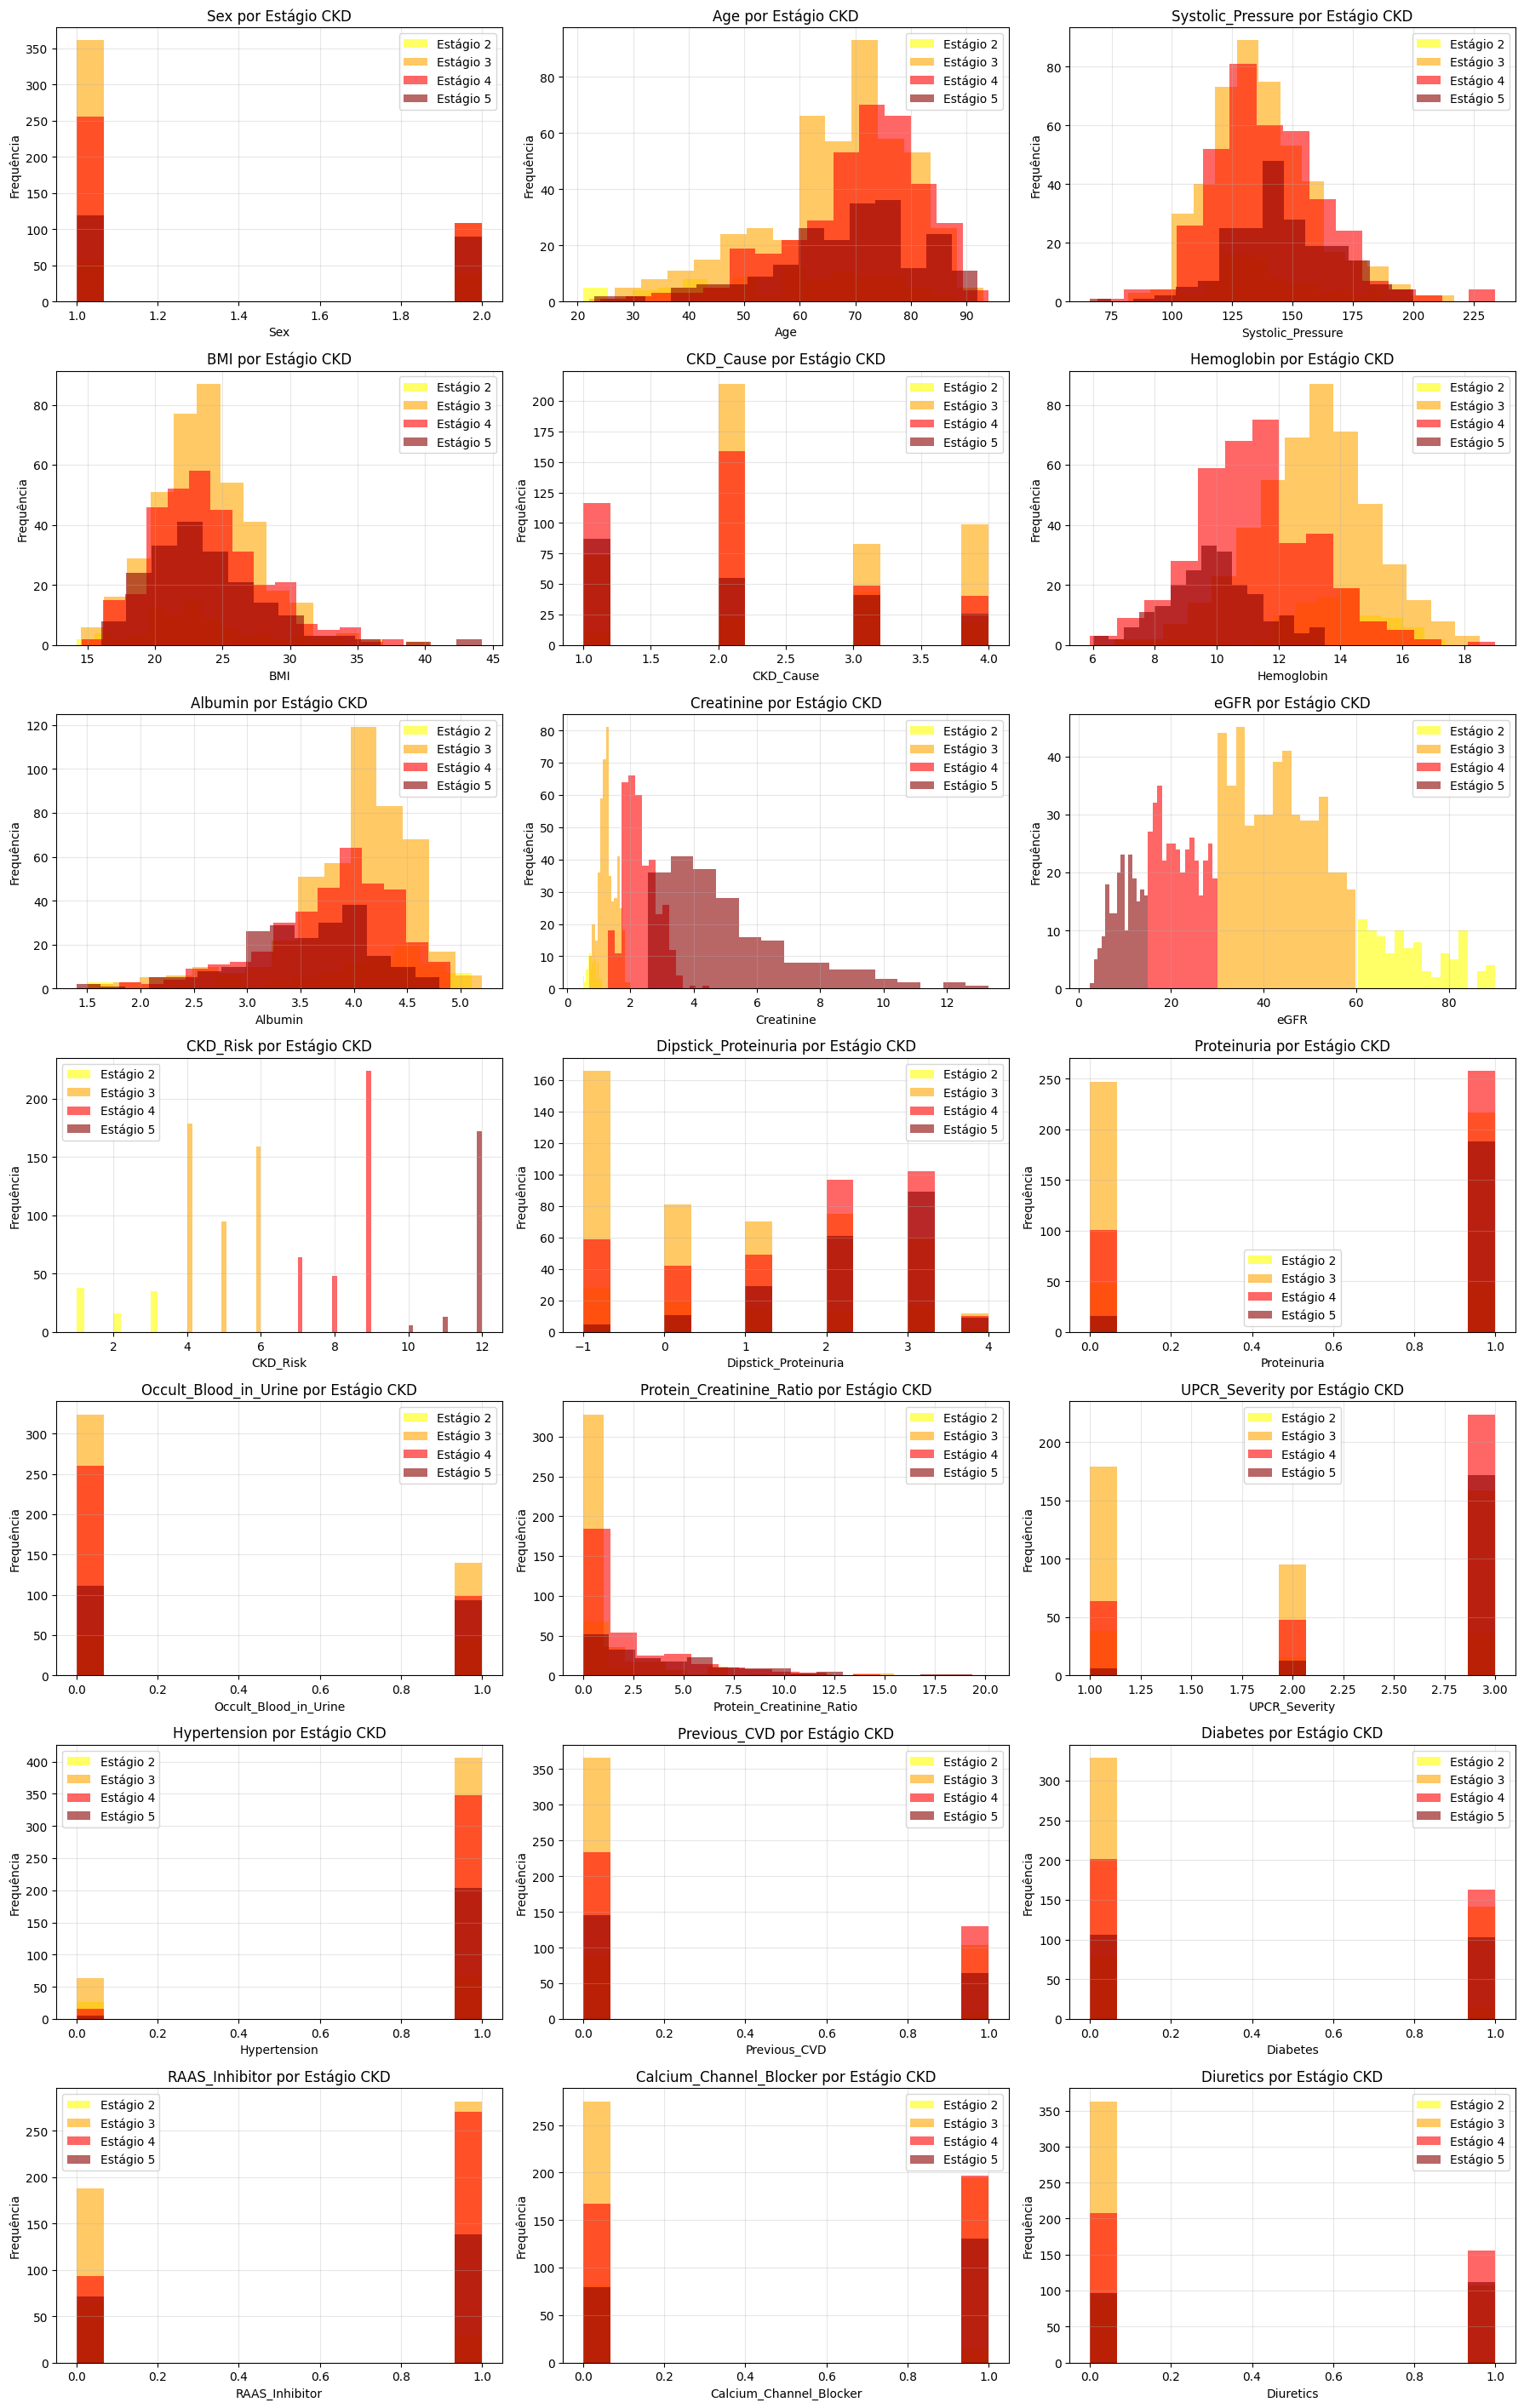

In [19]:
# Plotar histogramas para cada variável separados por CKD_Stage (CORRIGIDO)
cols_without_stage = [col for col in df.columns if col != 'CKD_Stage']
n_cols = 3
n_rows = math.ceil(len(cols_without_stage) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Cores para cada estágio
stage_colors = {1: 'green', 2: 'yellow', 3: 'orange', 4: 'red', 5: 'darkred'}
stage_labels = {1: 'Estágio 1', 2: 'Estágio 2', 3: 'Estágio 3', 4: 'Estágio 4', 5: 'Estágio 5'}

for idx, col in enumerate(cols_without_stage[:-1]):
    if col == 'CKD_Progression':
        continue  # Pular a outra variável alvo
    
    # Plotar histograma para cada estágio
    for stage in sorted(df['CKD_Stage'].unique()):
        data_stage = df[df['CKD_Stage'] == stage][col].dropna()
        if len(data_stage) > 0:  # Só plotar se houver dados
            axes[idx].hist(data_stage, bins=15, alpha=0.6, 
                          label=stage_labels[stage], 
                          color=stage_colors[stage])
    
    axes[idx].set_title(f'{col} por Estágio CKD')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequência')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Remove eixos extras
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlações:

#### Interpretação dos coeficientes de correlação

Os valores do coeficiente de correlação variam entre -1 e +1:

- **+1**: Correlação positiva perfeita (as variáveis aumentam juntas)
- **-1**: Correlação negativa perfeita (uma variável aumenta enquanto a outra diminui)
- **0**: Sem correlação linear

**Força da correlação:**
- **±0.7 a ±1.0**: Correlação forte
- **±0.3 a ±0.7**: Correlação moderada
- **±0.0 a ±0.3**: Correlação fraca

> **Observação:**  
> Correlação não implica causalidade. Mesmo que duas variáveis apresentem correlação forte, isso não significa que uma causa a outra.  
> Além disso, o coeficiente de correlação de Pearson avalia apenas relações lineares. Relações não-lineares podem não ser detectadas por esse método.

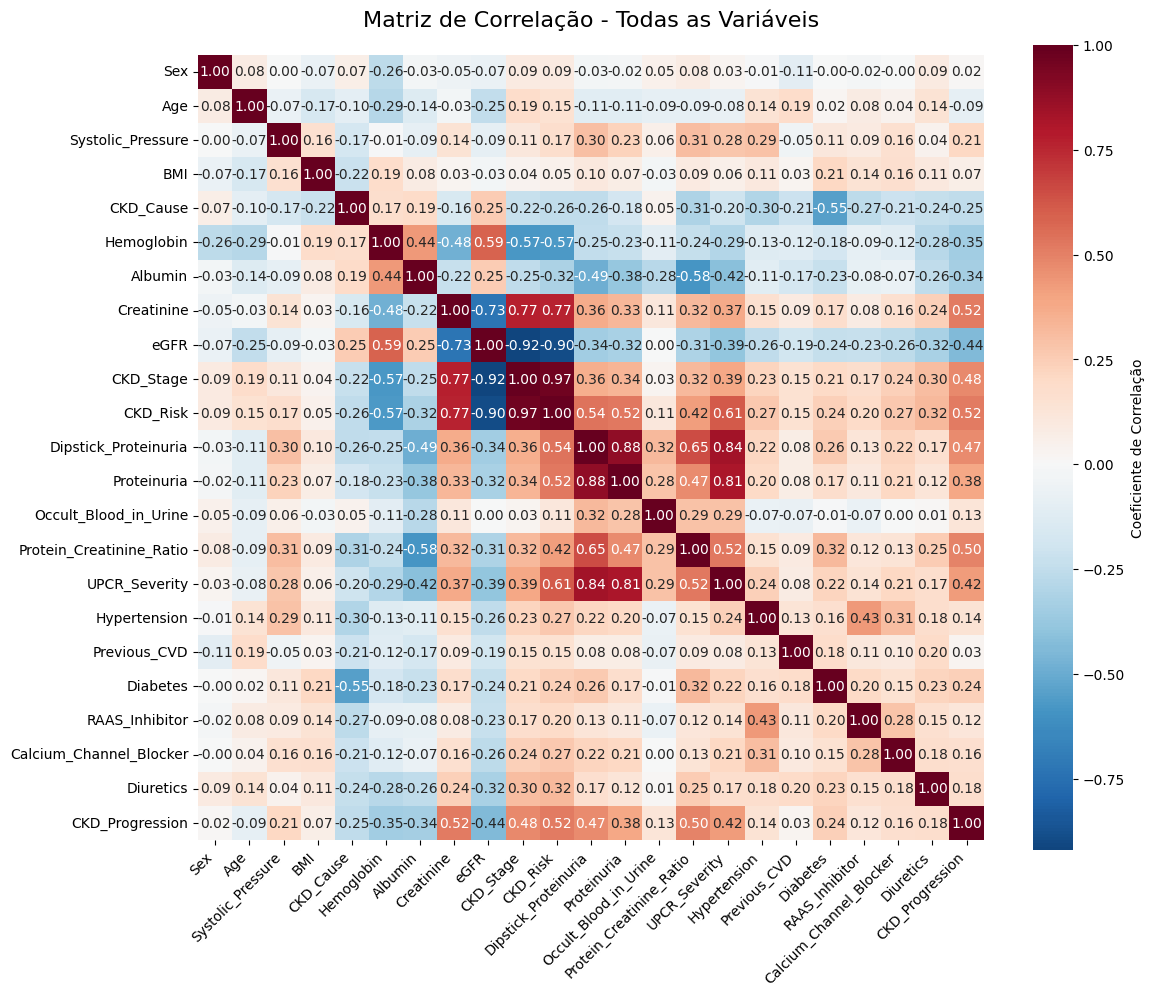

In [21]:
# Matriz de correlação de todas as variáveis numéricas
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()

# Heatmap de correlação
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores
            cmap='RdBu_r',        # Cores: vermelho=positiva, azul=negativa
            center=0,             # Centro em 0
            square=True,          # Células quadradas
            fmt='.2f',            # 2 casas decimais
            cbar_kws={'label': 'Coeficiente de Correlação'})

plt.title('Matriz de Correlação - Todas as Variáveis', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
# Correlações específicas com as variáveis alvo
print("=== CORRELAÇÕES COM CKD_PROGRESSION ===")
target_corr_prog = correlation_matrix['CKD_Progression'].sort_values(key=abs, ascending=False)
print(target_corr_prog)

print("\n=== CORRELAÇÕES COM CKD_STAGE ===")
target_corr_stage = correlation_matrix['CKD_Stage'].sort_values(key=abs, ascending=False)
print(target_corr_stage)

print("\n=== ANÁLISE DAS CORRELAÇÕES ===")
print("🔍 Correlações FORTES com CKD_Progression (>0.3):")
strong_prog = target_corr_prog[abs(target_corr_prog) > 0.3]
for var, corr in strong_prog.items():
    if var != 'CKD_Progression':
        direction = "positiva" if corr > 0 else "negativa"
        print(f"   {var}: {corr:.3f} ({direction})")

print("\n🔍 Correlações FORTES com CKD_Stage (>0.3):")
strong_stage = target_corr_stage[abs(target_corr_stage) > 0.3]
for var, corr in strong_stage.items():
    if var != 'CKD_Stage':
        direction = "positiva" if corr > 0 else "negativa"
        print(f"   {var}: {corr:.3f} ({direction})")

=== CORRELAÇÕES COM CKD_PROGRESSION ===
CKD_Progression             1.000000
Creatinine                  0.519546
CKD_Risk                    0.519427
Protein_Creatinine_Ratio    0.496221
CKD_Stage                   0.475472
Dipstick_Proteinuria        0.469856
eGFR                       -0.442793
UPCR_Severity               0.424114
Proteinuria                 0.382473
Hemoglobin                 -0.346122
Albumin                    -0.335144
CKD_Cause                  -0.254608
Diabetes                    0.237247
Systolic_Pressure           0.208264
Diuretics                   0.182685
Calcium_Channel_Blocker     0.163981
Hypertension                0.139671
Occult_Blood_in_Urine       0.128678
RAAS_Inhibitor              0.122086
Age                        -0.087465
BMI                         0.066758
Previous_CVD                0.032041
Sex                         0.017156
Name: CKD_Progression, dtype: float64

=== CORRELAÇÕES COM CKD_STAGE ===
CKD_Stage                   1.000000

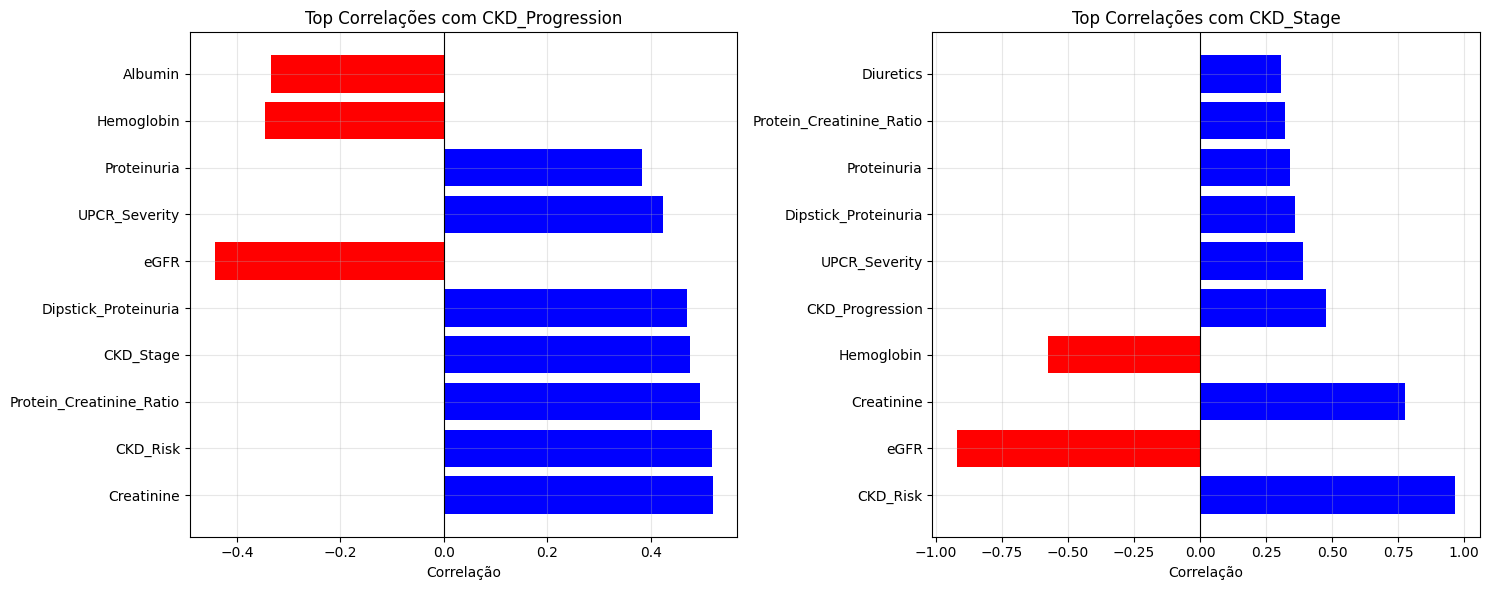

In [23]:
# Gráfico de barras das correlações mais importantes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Correlações com CKD_Progression (excluindo ela mesma)
prog_corr = target_corr_prog.drop('CKD_Progression')
top_prog = prog_corr.head(10)  # Top 10

ax1.barh(range(len(top_prog)), top_prog.values, 
         color=['red' if x < 0 else 'blue' for x in top_prog.values])
ax1.set_yticks(range(len(top_prog)))
ax1.set_yticklabels(top_prog.index)
ax1.set_xlabel('Correlação')
ax1.set_title('Top Correlações com CKD_Progression')
ax1.grid(True, alpha=0.3)
ax1.axvline(0, color='black', linewidth=0.8)

# Correlações com CKD_Stage (excluindo ela mesma)
stage_corr = target_corr_stage.drop('CKD_Stage')
top_stage = stage_corr.head(10)  # Top 10

ax2.barh(range(len(top_stage)), top_stage.values,
         color=['red' if x < 0 else 'blue' for x in top_stage.values])
ax2.set_yticks(range(len(top_stage)))
ax2.set_yticklabels(top_stage.index)
ax2.set_xlabel('Correlação')
ax2.set_title('Top Correlações com CKD_Stage')
ax2.grid(True, alpha=0.3)
ax2.axvline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

## Outliers:

#### 1. Método IQR (Interquartile Range) - Quartis


**Como funciona:**
- Calcula Q1 (25º percentil) e Q3 (75º percentil)
- IQR = Q3 - Q1
- Outliers: valores < Q1 - 1.5×IQR ou > Q3 + 1.5×IQR

**Vantagens:**
- Robusto para dados assimétricos
- Não assume distribuição normal
- Fácil interpretação

**Desvantagens:**
- Pode ser conservador (detecta poucos outliers)

---

In [25]:
## Detecção de Outliers

### Método 1: IQR (Interquartile Range)
print("=== DETECÇÃO DE OUTLIERS - MÉTODO IQR ===\n")

def detect_outliers_iqr(df, column):
    """Detecta outliers usando o método IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Analisar cada variável numérica
numeric_columns = df.select_dtypes(include=[np.number]).columns

outlier_summary = {}
for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'lower_bound': lower,
        'upper_bound': upper
    }
    
    print(f"📊 {col}:")
    print(f"   Outliers: {outlier_count} ({outlier_percentage:.1f}%)")
    print(f"   Limites: [{lower:.2f}, {upper:.2f}]")
    if outlier_count > 0:
        print(f"   Valores extremos: {outliers[col].min():.2f} a {outliers[col].max():.2f}")
    print()

=== DETECÇÃO DE OUTLIERS - MÉTODO IQR ===

📊 Sex:
   Outliers: 0 (0.0%)
   Limites: [-0.50, 3.50]

📊 Age:
   Outliers: 37 (3.3%)
   Limites: [37.00, 101.00]
   Valores extremos: 21.00 a 36.00

📊 Systolic_Pressure:
   Outliers: 27 (2.4%)
   Limites: [84.50, 192.50]
   Valores extremos: 66.00 a 234.00

📊 BMI:
   Outliers: 26 (2.3%)
   Limites: [13.80, 33.00]
   Valores extremos: 33.30 a 44.20

📊 CKD_Cause:
   Outliers: 0 (0.0%)
   Limites: [-2.00, 6.00]

📊 Hemoglobin:
   Outliers: 1 (0.1%)
   Limites: [5.10, 18.70]
   Valores extremos: 19.00 a 19.00

📊 Albumin:
   Outliers: 30 (2.6%)
   Limites: [2.30, 5.50]
   Valores extremos: 1.40 a 2.30

📊 Creatinine:
   Outliers: 89 (7.8%)
   Limites: [-1.02, 4.90]
   Valores extremos: 4.95 a 13.32

📊 eGFR:
   Outliers: 7 (0.6%)
   Limites: [-23.71, 86.18]
   Valores extremos: 86.78 a 89.98

📊 CKD_Stage:
   Outliers: 0 (0.0%)
   Limites: [1.50, 5.50]

📊 CKD_Risk:
   Outliers: 0 (0.0%)
   Limites: [-3.50, 16.50]

📊 Dipstick_Proteinuria:
   Outliers: 

#### 2. Método Z-Score - Desvio Padrão

**Como funciona:**
- Calcula quantos desvios padrão cada valor está da média
- Z = (valor - média) / desvio padrão
- Outliers: |Z| > 3 (padrão)

**Vantagens:**
- Sensível a valores extremos
- Padrão estatístico bem estabelecido

**Desvantagens:**
- Assume distribuição normal
- Sensível a outliers extremos

---

In [30]:
### Método 2: Z-Score
print("=== DETECÇÃO DE OUTLIERS - MÉTODO Z-SCORE ===\n")

def detect_outliers_zscore(df, column, threshold=3):
    """Detecta outliers usando Z-Score (padrão: |z| > 3)"""
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    outliers_idx = np.where(z_scores > threshold)[0]
    return outliers_idx, z_scores

for col in numeric_columns:
    outliers_idx, z_scores = detect_outliers_zscore(df, col)
    outlier_count = len(outliers_idx)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    print(f"📊 {col}:")
    print(f"   Outliers Z-Score: {outlier_count} ({outlier_percentage:.1f}%)")
    if outlier_count > 0:
        max_z = z_scores.max()
        print(f"   Z-Score máximo: {max_z:.2f}")
    print()

=== DETECÇÃO DE OUTLIERS - MÉTODO Z-SCORE ===

📊 Sex:
   Outliers Z-Score: 0 (0.0%)

📊 Age:
   Outliers Z-Score: 8 (0.7%)
   Z-Score máximo: 3.41

📊 Systolic_Pressure:
   Outliers Z-Score: 9 (0.8%)
   Z-Score máximo: 4.20

📊 BMI:
   Outliers Z-Score: 9 (0.8%)
   Z-Score máximo: 5.08

📊 CKD_Cause:
   Outliers Z-Score: 0 (0.0%)

📊 Hemoglobin:
   Outliers Z-Score: 1 (0.1%)
   Z-Score máximo: 3.08

📊 Albumin:
   Outliers Z-Score: 12 (1.1%)
   Z-Score máximo: 3.84

📊 Creatinine:
   Outliers Z-Score: 28 (2.5%)
   Z-Score máximo: 6.44

📊 eGFR:
   Outliers Z-Score: 1 (0.1%)
   Z-Score máximo: 3.06

📊 CKD_Stage:
   Outliers Z-Score: 0 (0.0%)

📊 CKD_Risk:
   Outliers Z-Score: 0 (0.0%)

📊 Dipstick_Proteinuria:
   Outliers Z-Score: 0 (0.0%)

📊 Proteinuria:
   Outliers Z-Score: 0 (0.0%)

📊 Occult_Blood_in_Urine:
   Outliers Z-Score: 0 (0.0%)

📊 Protein_Creatinine_Ratio:
   Outliers Z-Score: 24 (2.1%)
   Z-Score máximo: 5.58

📊 UPCR_Severity:
   Outliers Z-Score: 0 (0.0%)

📊 Hypertension:
   Outlier

#### 3. Boxplots - Visualização

**Como funciona:**
- Baseado no método IQR
- Mostra Q1, mediana, Q3 e outliers
- Pontos fora dos "bigodes" são outliers

**Vantagens:**
- Visualização clara
- Mostra distribuição dos dados
- Fácil identificação visual

**Desvantagens:**
- Apenas visualização (não quantifica)

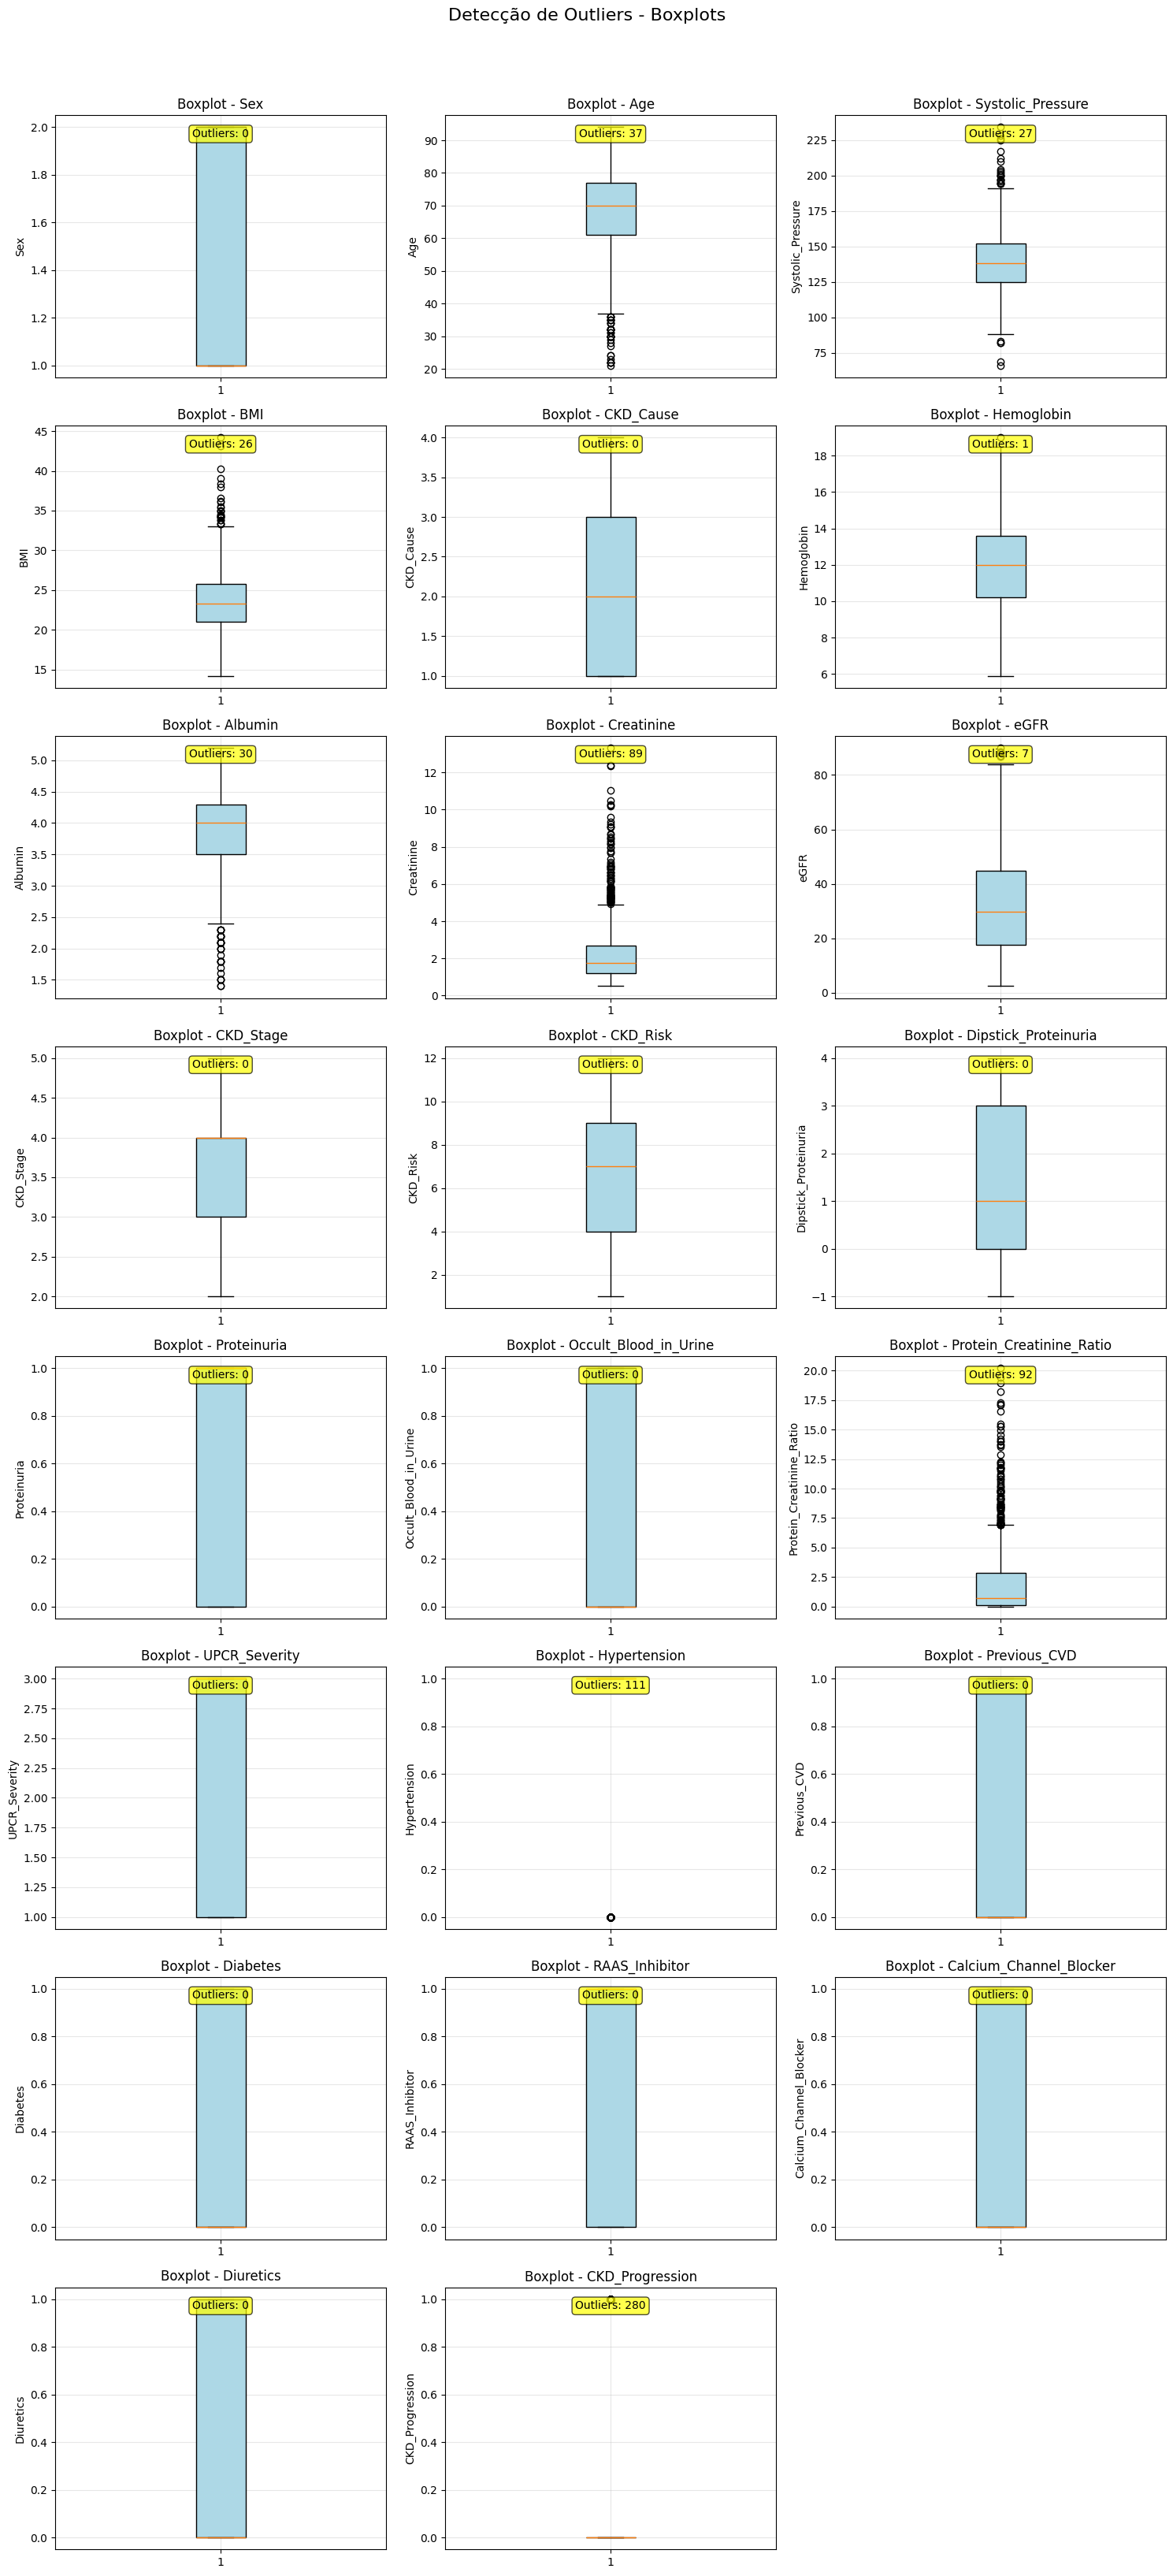

In [32]:
### Método 3: Boxplots para visualizar outliers
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    # Boxplot
    box_plot = axes[i].boxplot(df[col].dropna(), patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    
    axes[i].set_title(f'Boxplot - {col}')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)
    
    # Adicionar informações sobre outliers
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    axes[i].text(0.5, 0.95, f'Outliers: {outlier_count}', 
                transform=axes[i].transAxes, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Remove eixos extras
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Detecção de Outliers - Boxplots', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# 2 - Pré-processamento: 
Tratar valores faltantes. Normalizar ou padronizar atributos quando necessário. Separar o conjunto de dados (sugestão: 70% treino, 15% teste, 15% validação).

# 3 - Implementar três modelos de classificação:
Árvores de Decisão, Redes Neurais Artificiais (MLP), e outra técnica de aprendizado de máquina escolhida pela grupo do trabalho (entre as técnicas estudadas na disciplina)

# 4 - Avaliação dos Modelos:
Avaliar e comparar o desempenho dos modelos com as seguintes métricas: Acurácia, Precisão, Revocação (Recall), F1-Score, Matriz de Confusão e Área sob a curva ROC (AUC), se aplicável. Comentar sobre os casos de falso positivo e falso negativo, e suas implicações na área da saúde.

# 5 - Discussão e Conclusões:
Comparar os resultados obtidos entre os
modelos. Discutir qual técnica apresentou melhor desempenho e por quê. Apontar
limitações do estudo e possíveis melhorias.